In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_feather('../input/amexfeather/train_data.ftr')
train.shape

(5531451, 191)

In [2]:
test = pd.read_feather('../input/amexfeather/test_data.ftr')
print(test.shape)
print(min(train['S_2']),max(train['S_2']))

(11363762, 190)
2017-03-01 00:00:00 2018-03-31 00:00:00


In [3]:
first_statement_start = train.groupby('customer_ID').head(1)['S_2'].min()
first_statement_end = train.groupby('customer_ID').head(1)['S_2'].max()
last_statement_start = train.groupby('customer_ID').tail(1)['S_2'].min()
last_statement_end = train.groupby('customer_ID').tail(1)['S_2'].max()
print('first_statement_start: ',first_statement_start, 'first_statement_end:',first_statement_end)
print('last_statement_start: ',last_statement_start, 'last_statement_end:',last_statement_end)

first_statement_start:  2017-03-01 00:00:00 first_statement_end: 2018-03-31 00:00:00
last_statement_start:  2018-03-01 00:00:00 last_statement_end: 2018-03-31 00:00:00


In [4]:
first_statement_start = test.groupby('customer_ID').head(1)['S_2'].min()
first_statement_end = test.groupby('customer_ID').head(1)['S_2'].max()
last_statement_start = test.groupby('customer_ID').tail(1)['S_2'].min()
last_statement_end = test.groupby('customer_ID').tail(1)['S_2'].max()
print('first_statement_start: ',first_statement_start, 'first_statement_end:',first_statement_end)
print('last_statement_start: ',last_statement_start, 'last_statement_end:',last_statement_end)

first_statement_start:  2018-04-01 00:00:00 first_statement_end: 2019-10-31 00:00:00
last_statement_start:  2019-04-01 00:00:00 last_statement_end: 2019-10-31 00:00:00


In [5]:
train['customer_ID'].value_counts().head()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
a3111280bfa1ed8fafd0b06839eb707f4538497e8087cb62958bb03e1bdde214    13
a31376930229162f886c091e5a56a528f81c10a523285828ed05a6e9ccf56722    13
a312c595dfaee96c8a597107d2754a49b1acfd127400d98991762d87837b1b65    13
a312aff722e7230f9d6a313ff777d6f00166c6bada21a333982426758a2e2a9d    13
Name: customer_ID, dtype: int64

In [6]:
categorical = ['B_30', 'B_38', 'D_63', 'D_64', 'D_66','D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']

In the training set, the last statement of all customers was in March 2018, while in the test set the date of customers' last statements range from April through October 2019. Also the start date of first and last statement is 1 year apart and the number of statements per customer is 13 so AMX is giving statements on monthly basis 

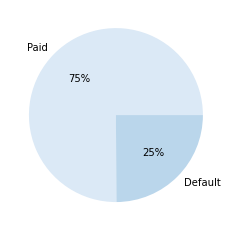

In [7]:
target_skew = train.target.value_counts()
labels=['Paid','Default']
palette_color = sns.color_palette("Blues")
plt.pie(target_skew,labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

About 25% of customers in the training data have defaulted.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


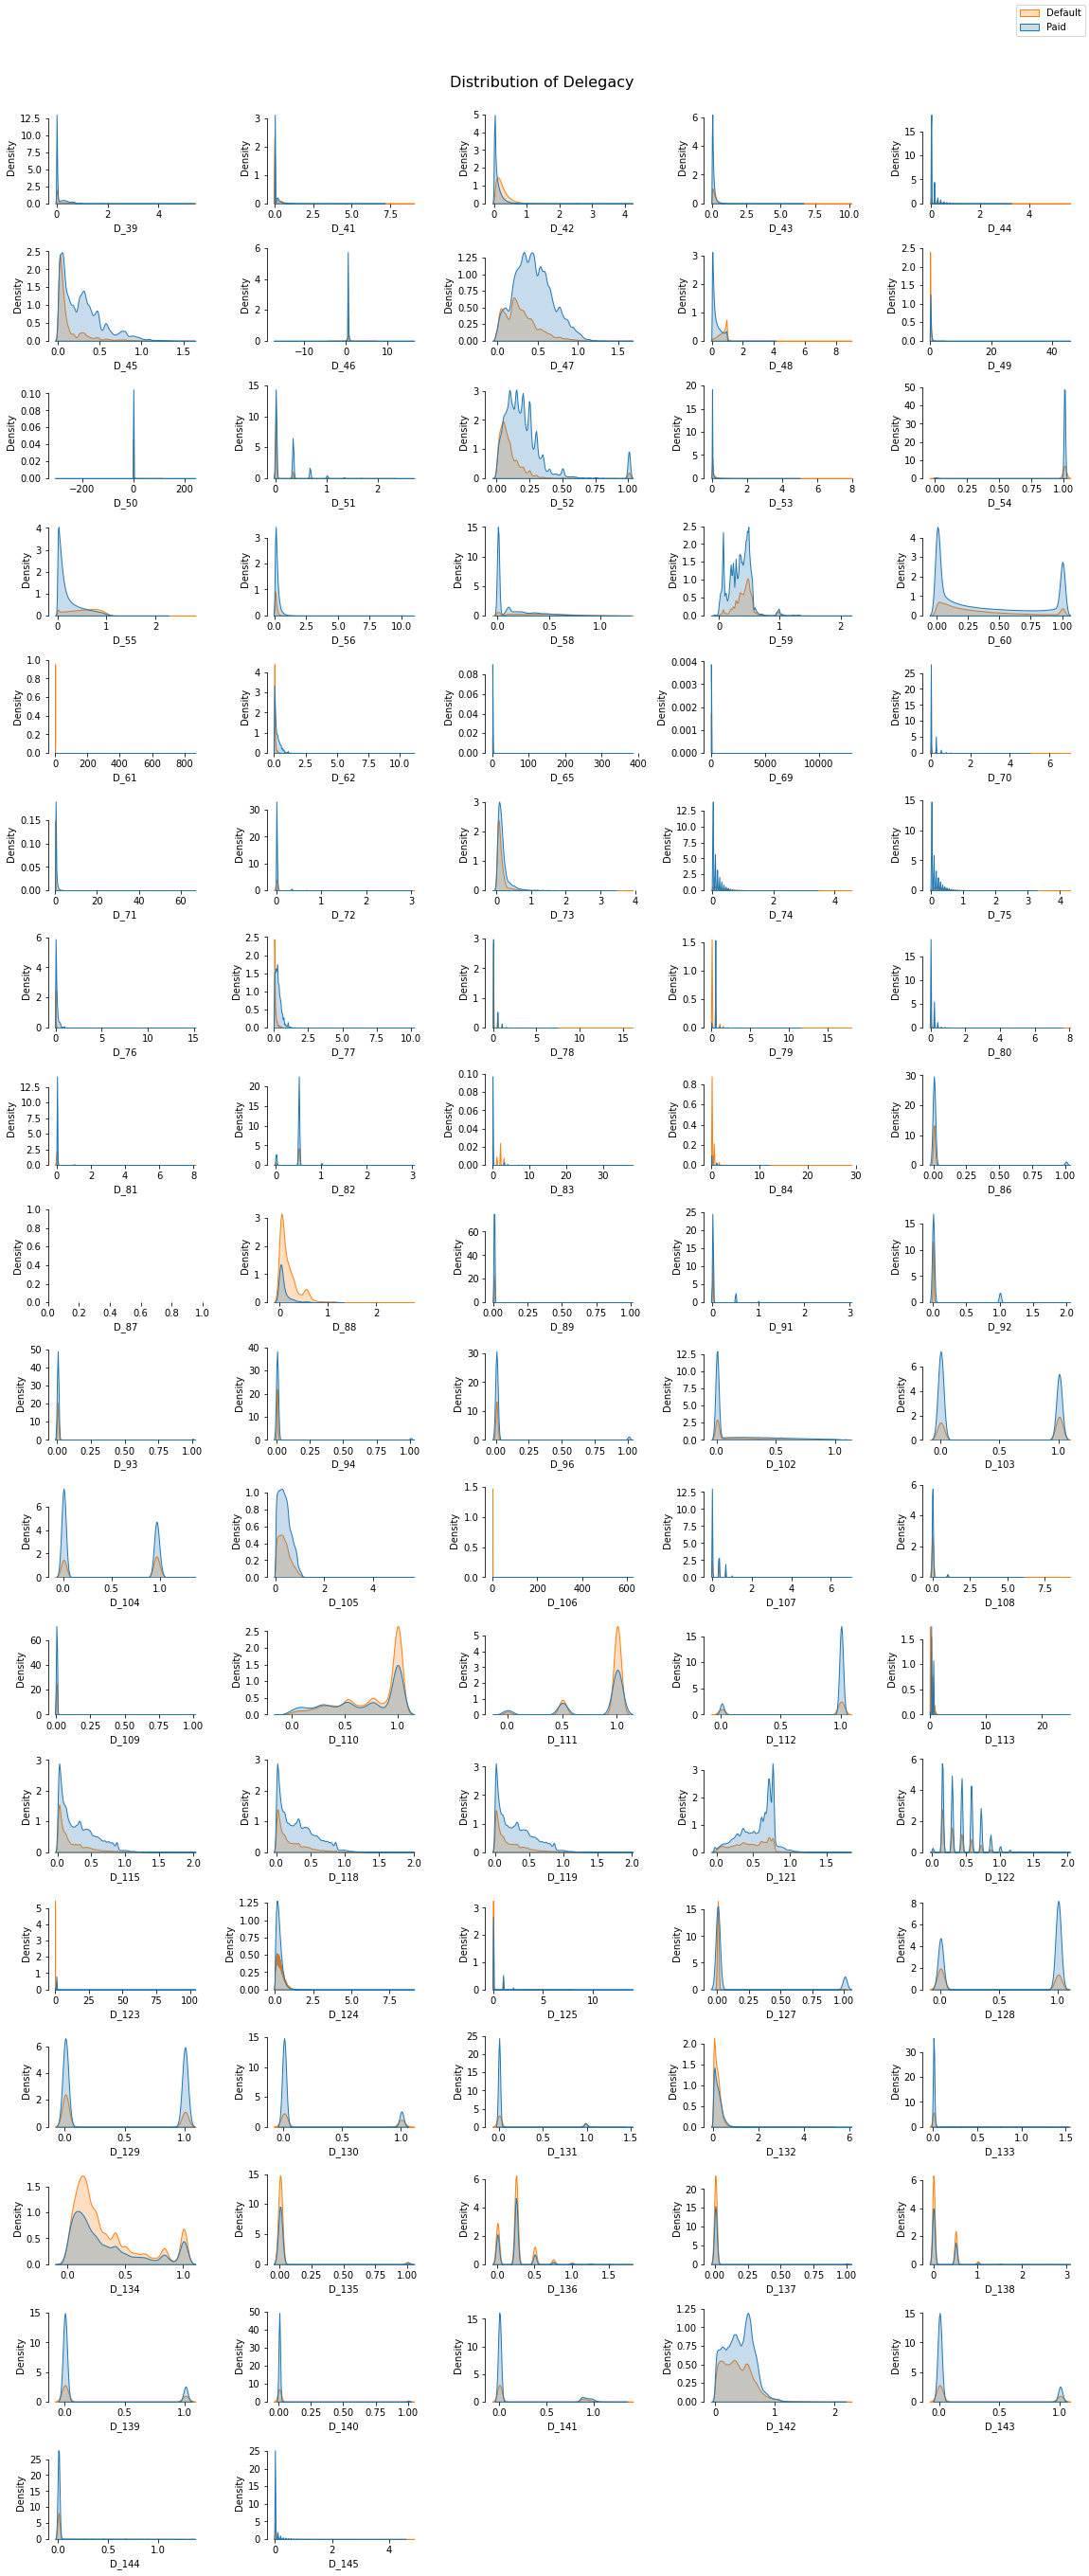

In [8]:
del_cols = [cols for cols in train.columns if cols.startswith('D') and cols not in categorical]
del_cols.append('target')
fig,ax = plt.subplots(18,5,figsize=(16,54))
fig.suptitle('Distribution of Delegacy', fontsize=16)
plot = train[del_cols]
row = 0
plt_col=0
for col in del_cols[:-1]: 
    sns.kdeplot(x = col , hue = 'target', label=['Default','Paid'], data=plot,ax=ax[row,plt_col%5],legend=False, fill=True)
    if plt_col%5==4:
        row+=1
    plt_col+=1
for i in range(2,5):
    ax[17,i].set_visible(False)
fig.legend(labels=['Default','Paid'])
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0,0.3,1,0.98])
    

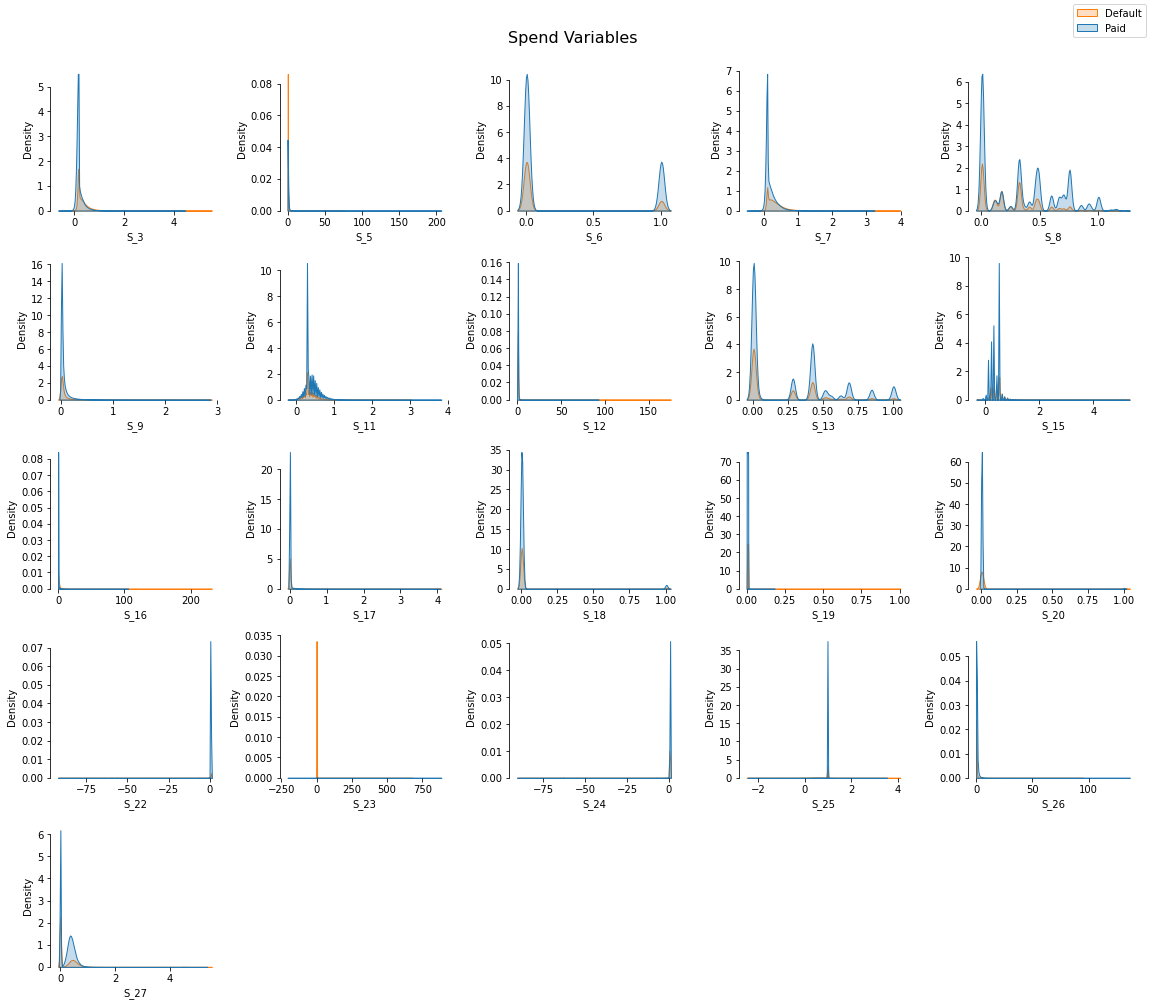

In [9]:
sp_cols =[cols for cols in train.columns if cols.startswith('S') and cols not in categorical]
sp_cols.append('target')
sp_cols.remove('S_2')
fig,ax = plt.subplots(5,5,figsize=(16,20))
fig.suptitle('Spend Variables', fontsize=16)
plot = train[sp_cols]
row = 0
plt_col=0
for col in sp_cols[:-1]: 
    sns.kdeplot(x = col , hue = 'target', label=['Default','Paid'], data=plot,ax=ax[row,plt_col%5],legend=False, fill=True)
    if plt_col%5==4:
        row+=1
    plt_col+=1
for i in range(1,5):
    ax[4,i].set_visible(False)
fig.legend(labels=['Default','Paid'])
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.3, 1, 0.98])

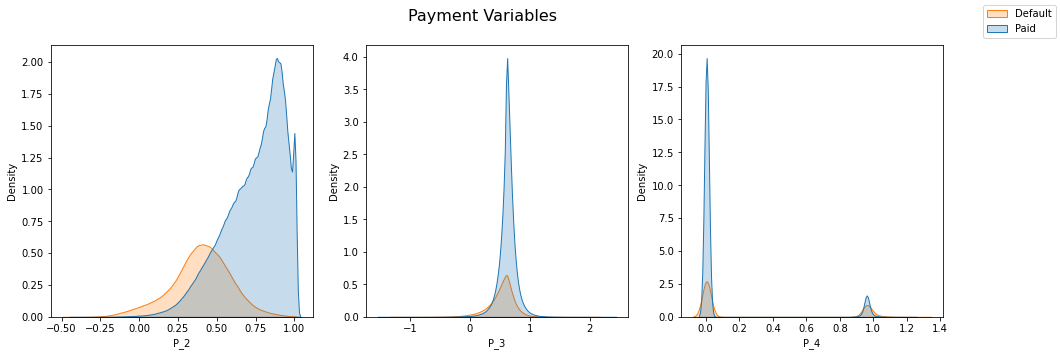

In [10]:
pay_cols = [col for col in train.columns if col.startswith('P') and col not in categorical]
pay_cols.append('target')
plot = train[pay_cols]
fig,ax = plt.subplots(1,3, figsize = (16,5))
fig.suptitle('Payment Variables',fontsize=16)
i=0
for col in pay_cols[:-1]:
    sns.kdeplot(x=col, hue='target', data=plot, legend=False, ax=ax[i], fill =True)
    i+=1
fig.legend(labels=['Default','Paid'])
    


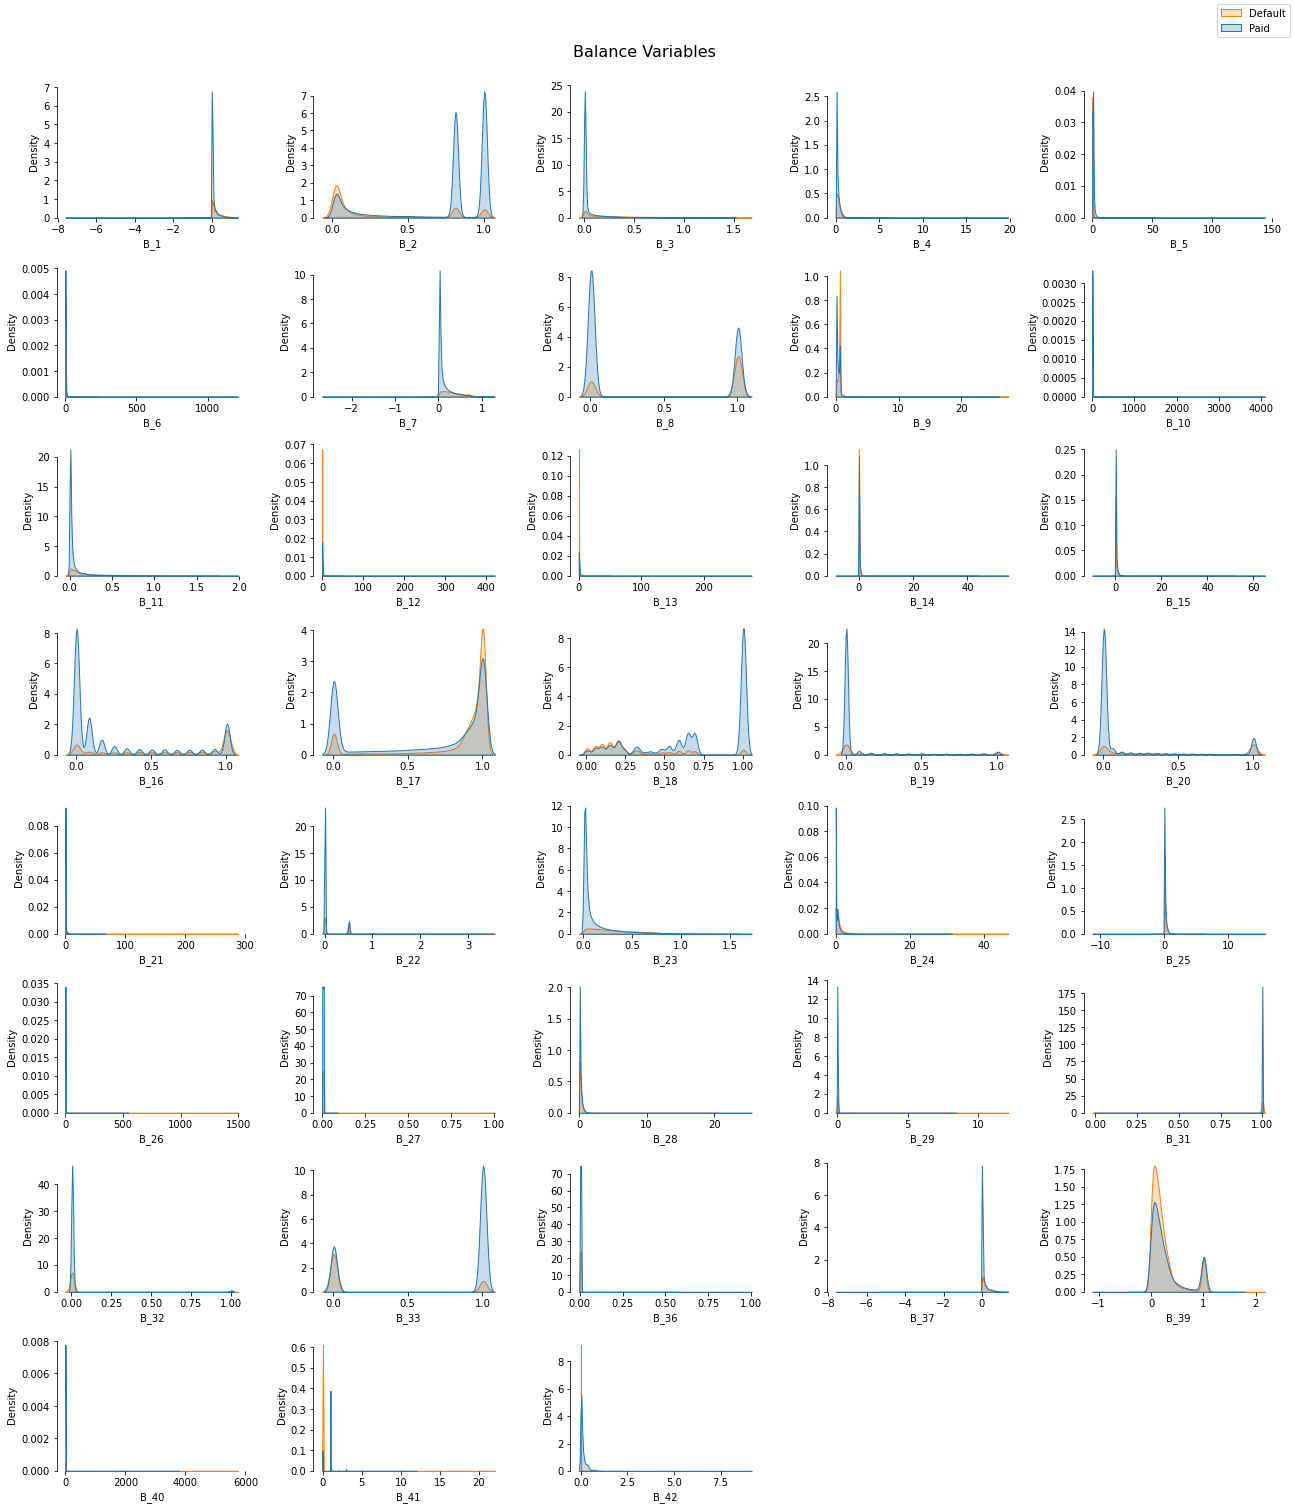

In [11]:
bal = [col for col in train.columns if col.startswith('B') and col not in categorical]
bal.append('target')
plot = train[bal]
fig, ax = plt.subplots(8,5, figsize=(18,30))
fig.suptitle('Balance Variables', fontsize = 16)
i=0
for col in bal[:-1]:
    sns.kdeplot(x=col , hue='target', data=plot, ax=ax[i//5,i%5], fill=True, legend=False)
    i+=1
fig.legend(labels=['Default','Paid'])
for i in range(3,5):
    ax[7,i].set_visible(False)
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.3, 1, 0.98])

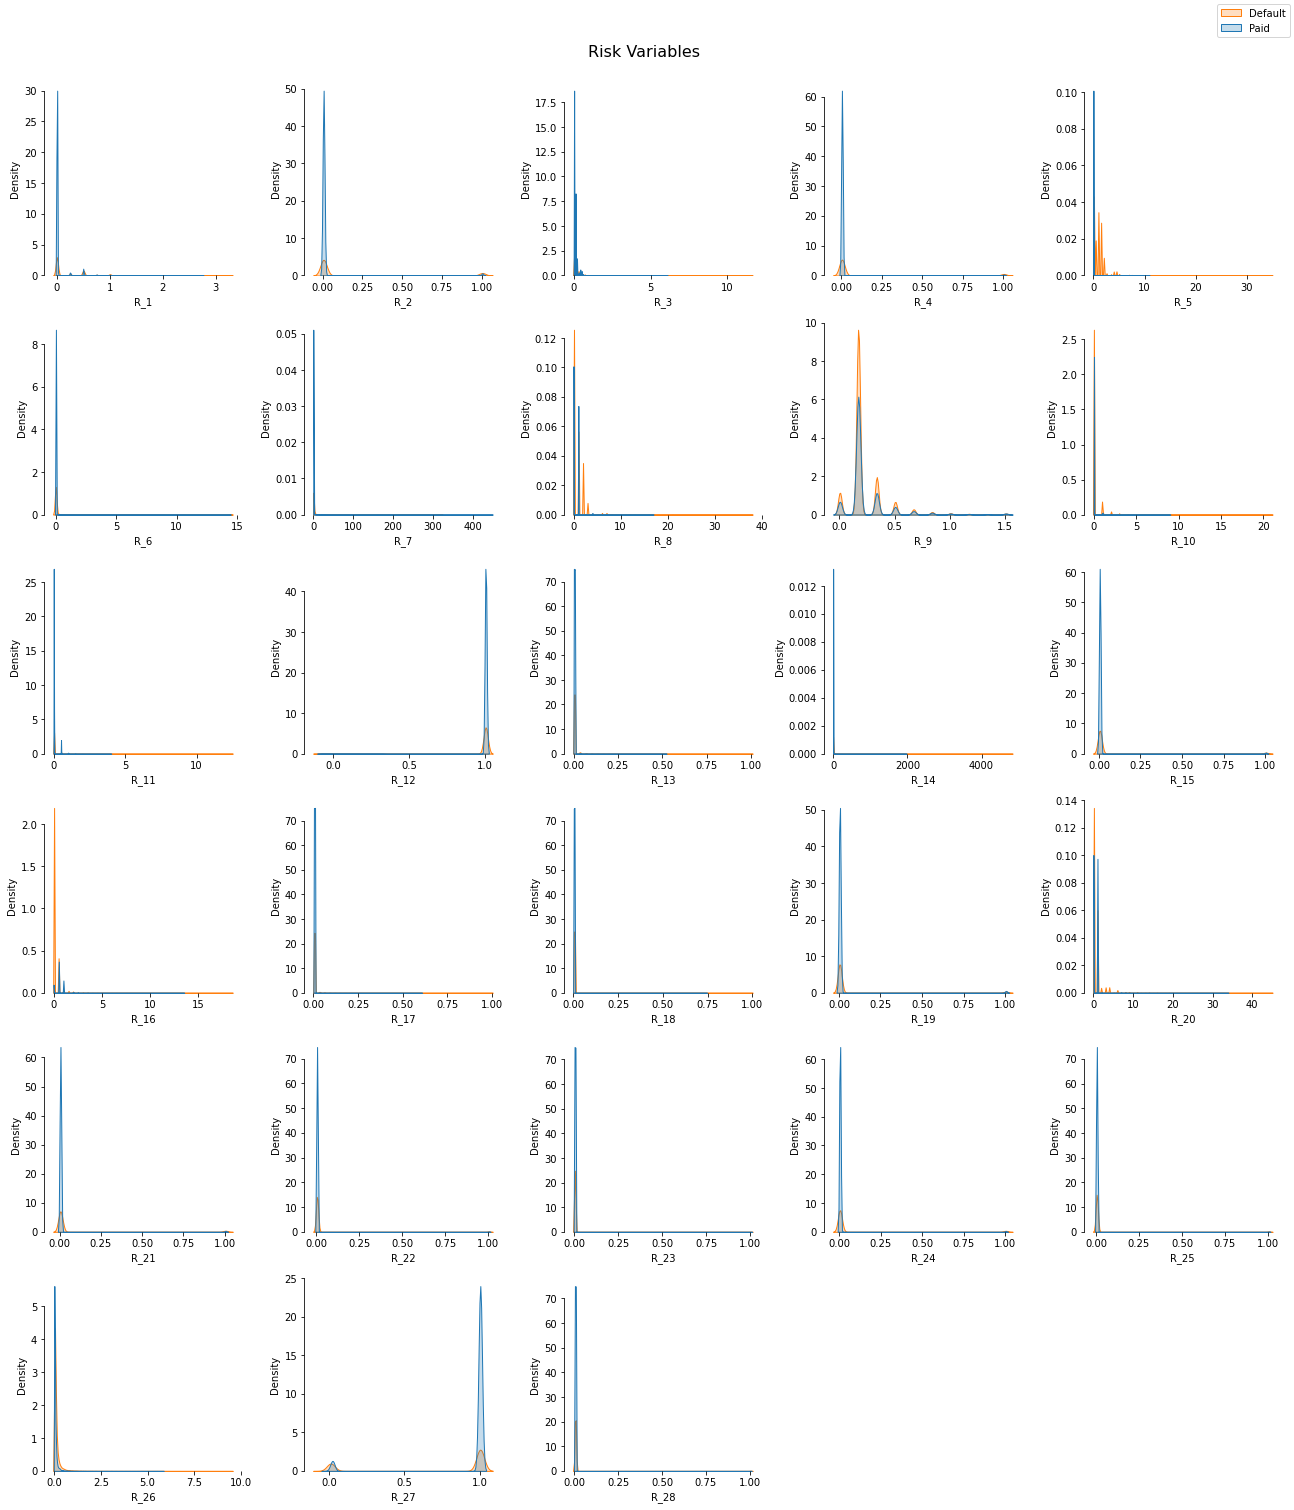

In [12]:
risk = [col for col in train.columns if col.startswith('R') and col not in categorical]
risk.append('target')
plot = train[risk]
fig, ax = plt.subplots(6,5, figsize=(18,30))
fig.suptitle('Risk Variables', fontsize = 16)
i=0
for col in risk[:-1]:
    sns.kdeplot(x=col , hue='target', data=plot, ax=ax[i//5,i%5], fill=True,legend = False)
    i+=1
fig.legend(labels=['Default','Paid'])
for i in range(3,5):
    ax[5,i].set_visible(False)
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.3, 1, 0.98])

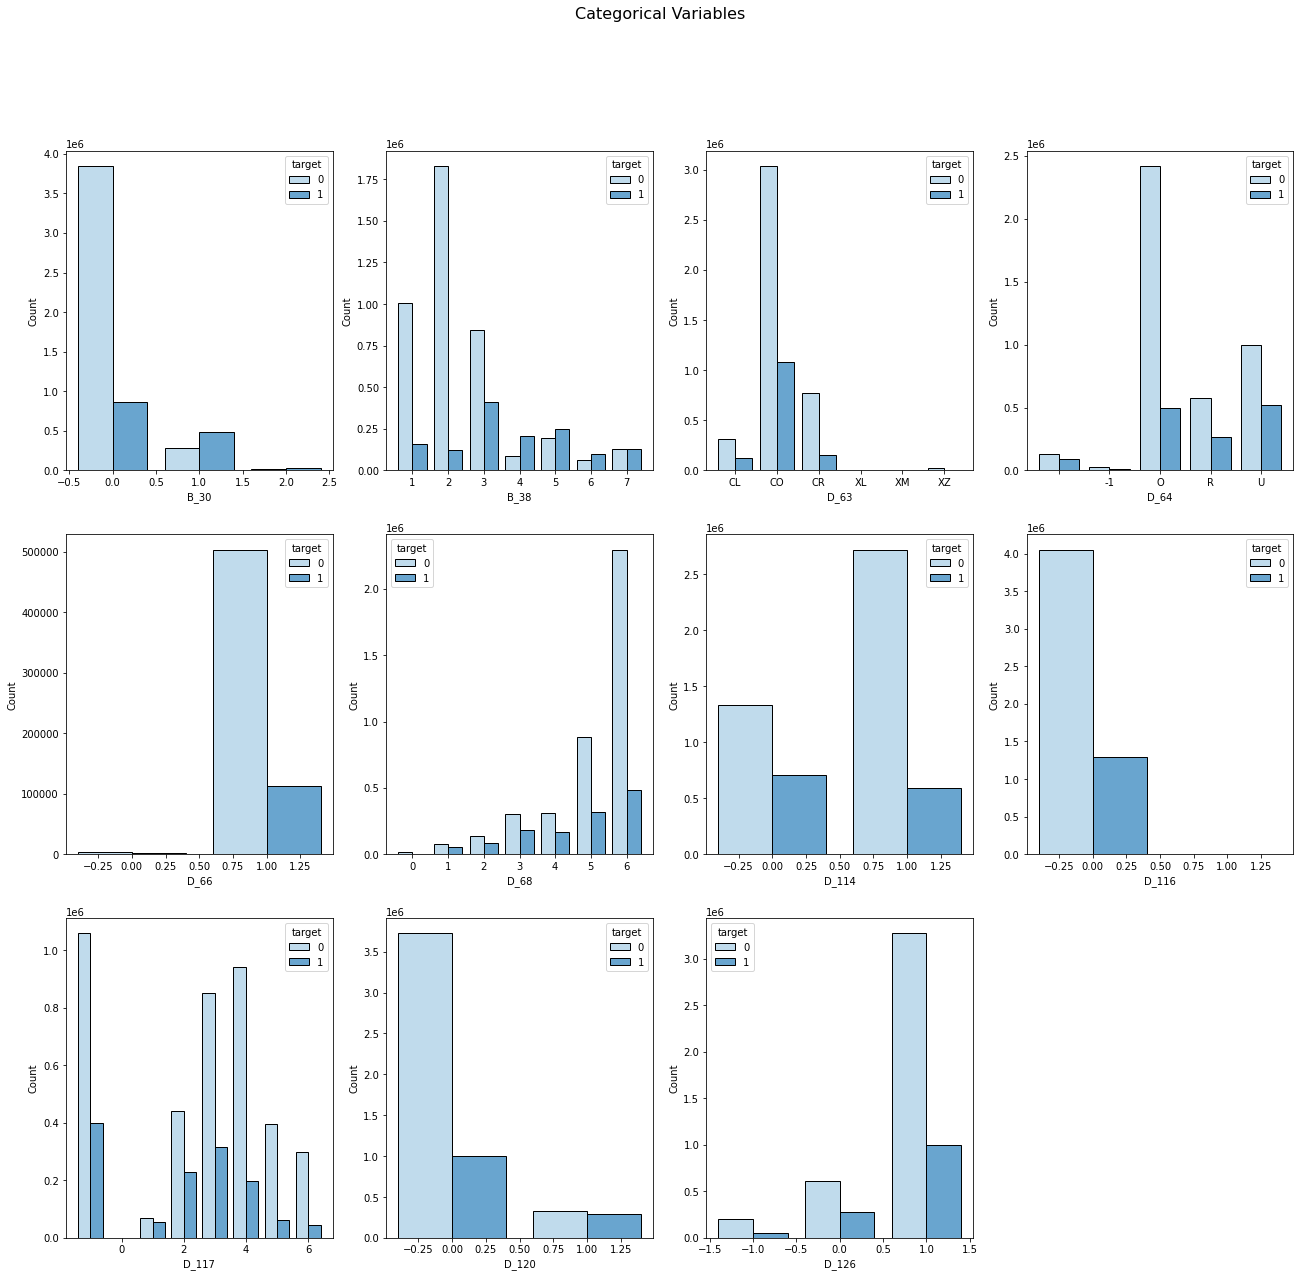

In [13]:
categorical.append('target')
plot = train[categorical]
fig,ax = plt.subplots(3,4, figsize=(22,20))
fig.suptitle('Categorical Variables', fontsize=16)

i=0
for cat in categorical[:-1]:
    sns.histplot(plot, x=cat, hue="target", multiple="dodge", ax =ax[i//4,i%4],palette='Blues',shrink=.8)
    i+=1
ax[2,3].set_visible(False)

In [14]:
df = pd.DataFrame(train.corrwith(train['target']))
df= df.sort_values(0)

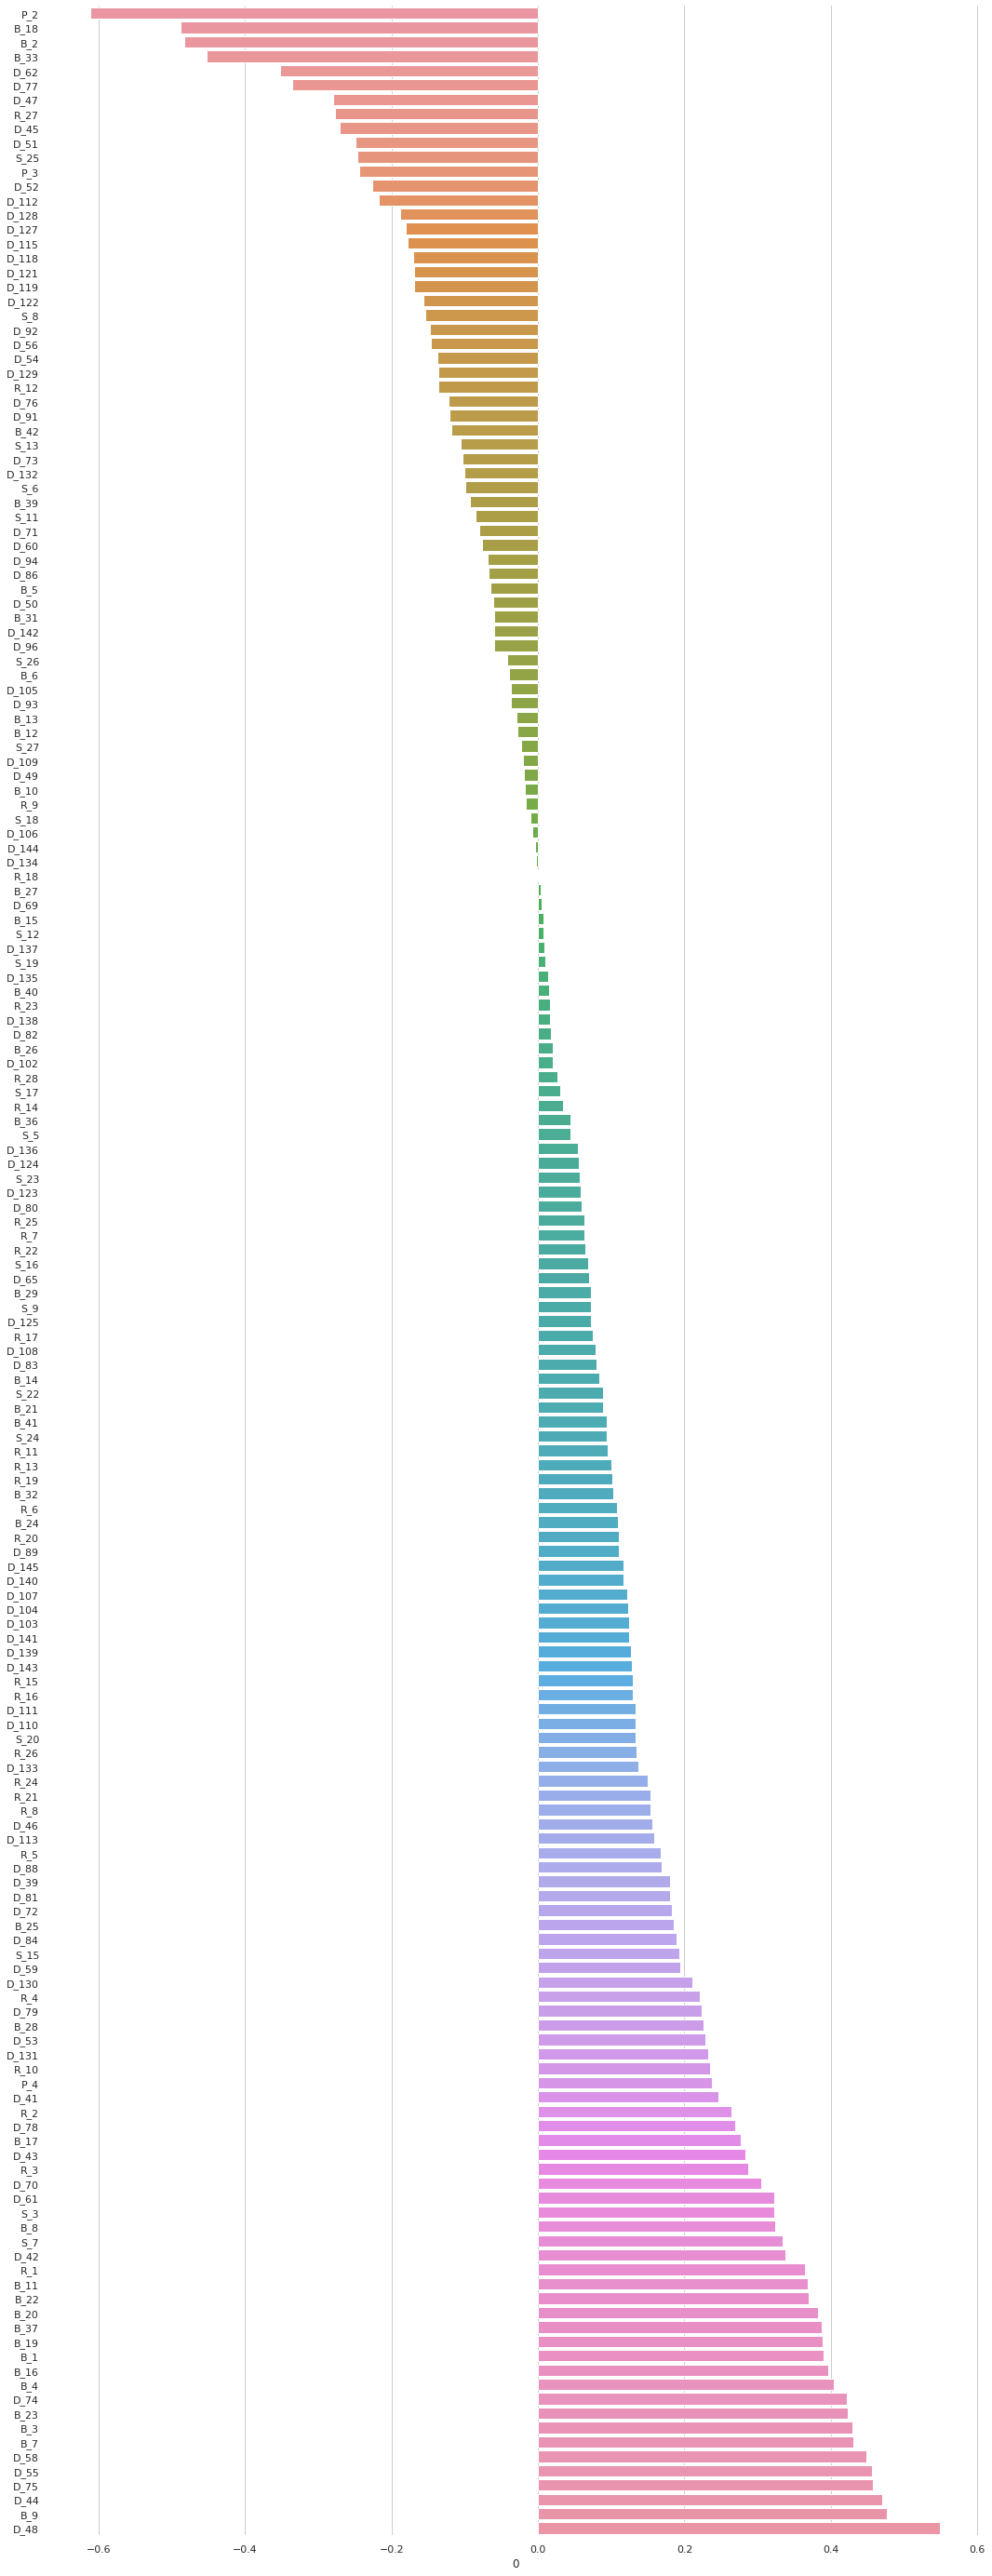

In [15]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1,1,figsize=(18,50))
sns.barplot(x=df[0][:-2] , y= df.index [:-2], orient='h' , ax=ax)
sns.despine(left=True, bottom=True)

# <b><span style='color:#4B4B4B'></span><span style='color:#016CC9'> Default Prediction</span></b>
Due to the proportion of missing values, as well as some of the outliers seen in the distributions, I will use LightGBM as a baseline model to predict the likelihood of default. In addition, since the target variable is slightly imbalanced, I will use Stratified K-Fold cross-validation to maintain the class distribution in each training and validation set.

The evaluation metric, $M$, for this competition is the mean of two measures of rank ordering: Normalized Gini Coefficient, $G$, and default rate captured at 4%, $D$.

<p style='text-align:center'>$M=0.5⋅(G+D)$ </p>  

The default rate captured at 4% is the percentage of the positive labels (defaults) captured within the highest-ranked 4% of the predictions, and represents a Sensitivity/Recall statistic.

For both of the sub-metrics $G$ and $D$, the negative labels are given a weight of 20 to adjust for downsampling.

This metric has a maximum value of 1.0.

Python code for calculating this metric can be found in [this Notebook](https://www.kaggle.com/code/inversion/amex-competition-metric-python).

In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import warnings, gc
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
train = train.groupby('customer_ID').tail(1).set_index('customer_ID')
test = test.groupby('customer_ID').tail(1).set_index('customer_ID')
del test['S_2']
del train['S_2']
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))

In [17]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)
    
    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)


def plot_roc(y_val,y_prob):
    colors=px.colors.qualitative.Prism
    fig=go.Figure()
    fig.add_trace(go.Scatter(x=np.linspace(0,1,11), y=np.linspace(0,1,11), 
                             name='Random Chance',mode='lines', showlegend=False,
                             line=dict(color="Black", width=1, dash="dot")))
    for i in range(len(y_val)):
        y=y_val[i]
        prob=y_prob[i]
        fpr, tpr, _ = roc_curve(y, prob)
        roc_auc = auc(fpr,tpr)
        fig.add_trace(go.Scatter(x=fpr, y=tpr, line=dict(color=colors[::-1][i+1], width=3), 
                                 hovertemplate = 'True positive rate = %{y:.3f}<br>False positive rate = %{x:.3f}',
                                 name='Fold {}:  Gini = {:.3f}, AUC = {:.3f}'.format(i+1, gini[i],roc_auc)))
    fig.update_layout(template=temp, title="Cross-Validation ROC Curves", 
                      hovermode="x unified", width=700,height=600,
                      xaxis_title='False Positive Rate (1 - Specificity)',
                      yaxis_title='True Positive Rate (Sensitivity)',
                      legend=dict(orientation='v', y=.07, x=1, xanchor="right",
                                  bordercolor="black", borderwidth=.5))
    fig.show()


Fold 1
Train shape: (413021, 188), (413021,), Valid shape: (45892, 188), (45892,)

Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.971327	training's binary_logloss: 0.191196	valid_1's auc: 0.959852	valid_1's binary_logloss: 0.221868
Early stopping, best iteration is:
[559]	training's auc: 0.97245	training's binary_logloss: 0.188027	valid_1's auc: 0.959899	valid_1's binary_logloss: 0.221776
Validation Gini: 0.78717, AUC: 0.9599

Fold 2
Train shape: (413021, 188), (413021,), Valid shape: (45892, 188), (45892,)

Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.971298	training's binary_logloss: 0.191223	valid_1's auc: 0.959829	valid_1's binary_logloss: 0.222303
Early stopping, best iteration is:
[530]	training's auc: 0.971893	training's binary_logloss: 0.189559	valid_1's auc: 0.959853	valid_1's binary_logloss: 0.222244
Validation Gini: 0.78309, AUC: 0.9599

Fold 3
Train shape: (413021, 188), (413021,), Valid shape:

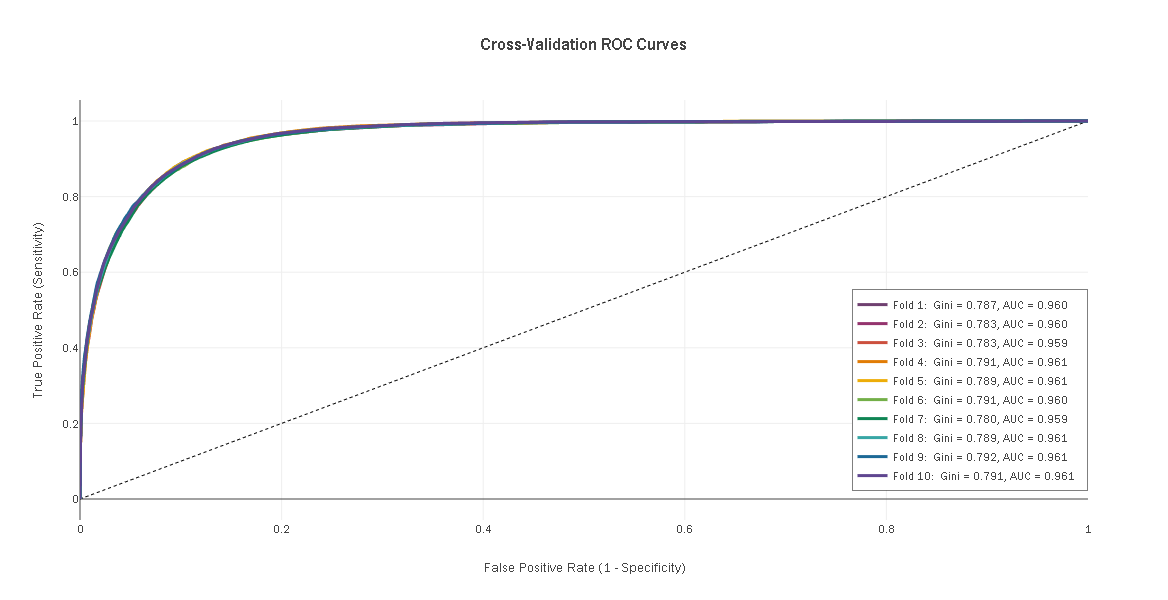

In [18]:
enc = LabelEncoder()
for col in categorical[:-1]:
    train[col] = enc.fit_transform(train[col])
    test[col] = enc.transform(test[col])

X=train.drop(['target'],axis=1)
y=train['target']
y_valid, gbm_val_probs, gbm_test_preds, gini=[],[],[],[]
ft_importance=pd.DataFrame(index=X.columns)
sk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)
for fold, (train_idx, val_idx) in enumerate(sk_fold.split(X, y)):
    
    print("\nFold {}".format(fold+1))
    X_train, y_train = X.iloc[train_idx,:], y[train_idx]
    X_val, y_val = X.iloc[val_idx,:], y[val_idx]
    print("Train shape: {}, {}, Valid shape: {}, {}\n".format(
        X_train.shape, y_train.shape, X_val.shape, y_val.shape))
    
    params = {'boosting_type': 'gbdt',
              'n_estimators': 1000,
              'num_leaves': 50,
              'learning_rate': 0.05,
              'colsample_bytree': 0.9,
              'min_child_samples': 2000,
              'max_bins': 500,
              'reg_alpha': 2,
              'objective': 'binary',
              'random_state': 21}
    
    gbm = LGBMClassifier(**params).fit(X_train, y_train, 
                                       eval_set=[(X_train, y_train), (X_val, y_val)],
                                       callbacks=[early_stopping(200), log_evaluation(500)],
                                       eval_metric=['auc','binary_logloss'])
    gbm_prob = gbm.predict_proba(X_val)[:,1]
    gbm_val_probs.append(gbm_prob)
    y_valid.append(y_val)
    
    y_pred=pd.DataFrame(data={'prediction':gbm_prob})
    y_true=pd.DataFrame(data={'target':y_val.reset_index(drop=True)})
    gini_score=amex_metric(y_true = y_true, y_pred = y_pred)
    gini.append(gini_score)
    
    
    auc_score=roc_auc_score(y_val, gbm_prob)
    gbm_test_preds.append(gbm.predict_proba(test)[:,1])    
    ft_importance["Importance_Fold"+str(fold)]=gbm.feature_importances_    
    print("Validation Gini: {:.5f}, AUC: {:.4f}".format(gini_score,auc_score))
    
    del X_train, y_train, X_val, y_val
    _ = gc.collect()
    
del X, y
plot_roc(y_valid, gbm_val_probs)

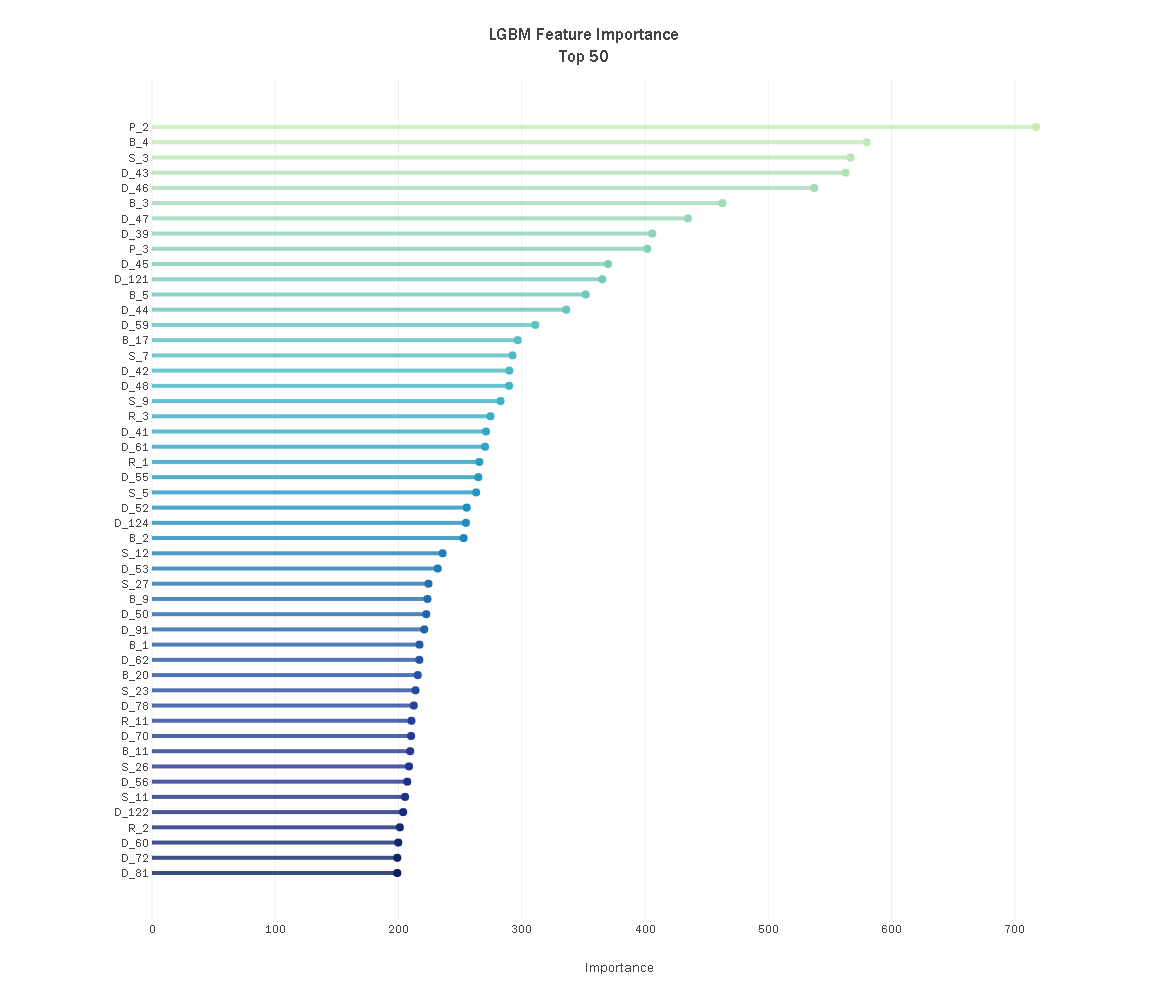

In [19]:
ft_importance['avg']=ft_importance.mean(axis=1)
ft_importance=ft_importance.avg.nlargest(50).sort_values(ascending=True)

pal=sns.color_palette("YlGnBu", 65).as_hex()
fig=go.Figure()
for i in range(len(ft_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=ft_importance[i], 
                       line_color=pal[::-1][i],opacity=0.8,line_width=4))
fig.add_trace(go.Scatter(x=ft_importance, y=ft_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,
                         hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))
fig.update_layout(template=temp,title='LGBM Feature Importance<br>Top 50', 
                  margin=dict(l=150,t=80),
                  xaxis=dict(title='Importance', zeroline=False),
                  yaxis_showgrid=False, height=1000, width=800)
fig.show()
